In [1]:
import seaborn as sns
import pandas as pd
from scipy import stats
from scipy.stats import linregress
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def polynomial_regression(X, y, order=1, confidence=95, num=100):
    confidence = 1 - ((1 - (confidence / 100)) / 2)
    y_model = np.polyval(np.polyfit(X, y, order), X)
    residual = y - y_model
    n = X.size                     
    m = 2                          
    dof = n - m  
    t = stats.t.ppf(confidence, dof) 
    std_error = (np.sum(residual**2) / dof)**.5
    X_line = np.linspace(np.min(X), np.max(X), num)
    y_line = np.polyval(np.polyfit(X, y, order), X_line)
    ci = t * std_error * (1/n + (X_line - np.mean(X))**2 / np.sum((X - np.mean(X))**2))**.5
    return X_line, y_line, ci

In [3]:
def fitDepthCounts(df, types, order): #types genes or junctions
    df.columns = ['level', 'count', 'depth', 'depth_unique', 'sample']
    X_line, y_line, ci = polynomial_regression(df['depth_unique'], df['count'], order=order)
    sns.set(font_scale=1.5)
    print(df.head())
    plt.scatter(df['depth_unique'], df['count'])
    plt.plot(X_line, y_line)
    plt.ylabel('# of ' + types)
    plt.fill_between(X_line, y_line - ci, y_line + ci, alpha=.5)
    coef_array = np.polyfit(df['depth_unique'], df['count'], order)
    return(coef_array)

  level  count      depth  depth_unique                sample
0  high   9660   72286717      68111224  ./covid/ID39_1st_TPM
1  high  10753  109730160     101160321  ./covid/ID39_2nd_TPM
2  high  10751  125809399     117241471  ./covid/ID39_3rd_TPM
3  high  10564   88385364      83779221  ./covid/ID40_1st_TPM
4  high   9991   68981285      64649886  ./covid/ID40_2nd_TPM


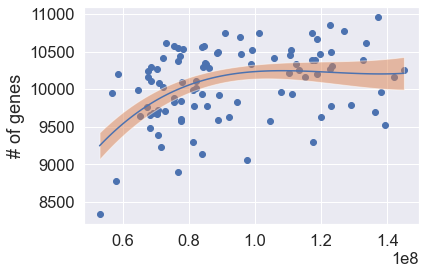

In [16]:
df = pd.read_csv("majiq_covid_genes_alpha_high", sep=' ', header=None)#for the 1-5 days: majiq_covid_genes_alpha_high_1st
coefficients = fitDepthCounts(df, "genes", 3)

  level  count      depth  depth_unique                sample
0   mid    725   72286717      68111224  ./covid/ID39_1st_TPM
1   mid    963  109730160     101160321  ./covid/ID39_2nd_TPM
2   mid   1048  125809399     117241471  ./covid/ID39_3rd_TPM
3   mid    752   88385364      83779221  ./covid/ID40_1st_TPM
4   mid    829   68981285      64649886  ./covid/ID40_2nd_TPM


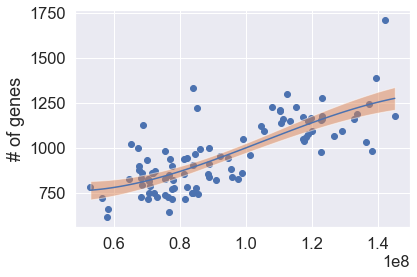

In [17]:
df = pd.read_csv("majiq_covid_genes_alpha_mid", sep=' ', header=None)#for the 1-5 days: majiq_covid_genes_alpha_mid_1st
coefficients = fitDepthCounts(df, "genes", 3)

  level  count      depth  depth_unique                sample
0   low   2081   72286717      68111224  ./covid/ID39_1st_TPM
1   low   2527  109730160     101160321  ./covid/ID39_2nd_TPM
2   low   2815  125809399     117241471  ./covid/ID39_3rd_TPM
3   low   2351   88385364      83779221  ./covid/ID40_1st_TPM
4   low   2222   68981285      64649886  ./covid/ID40_2nd_TPM


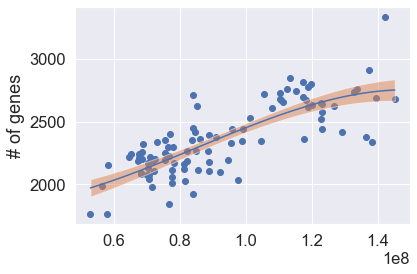

In [18]:
df = pd.read_csv("majiq_covid_genes_alpha_low", sep=' ', header=None)
coefficients = fitDepthCounts(df, "genes", 3)

  level  count      depth  depth_unique                sample
0  high   9660   72286717      68111224  ./covid/ID39_1st_TPM
1  high  10753  109730160     101160321  ./covid/ID39_2nd_TPM
2  high  10751  125809399     117241471  ./covid/ID39_3rd_TPM
3  high  10564   88385364      83779221  ./covid/ID40_1st_TPM
4  high   9991   68981285      64649886  ./covid/ID40_2nd_TPM


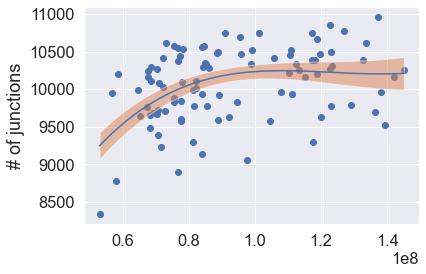

In [19]:
df = pd.read_csv("majiq_covid_genes_alpha_high", sep=' ', header=None)
coefficients = fitDepthCounts(df, "junctions", 3)

  level  count      depth  depth_unique                sample
0   mid    725   72286717      68111224  ./covid/ID39_1st_TPM
1   mid    963  109730160     101160321  ./covid/ID39_2nd_TPM
2   mid   1048  125809399     117241471  ./covid/ID39_3rd_TPM
3   mid    752   88385364      83779221  ./covid/ID40_1st_TPM
4   mid    829   68981285      64649886  ./covid/ID40_2nd_TPM


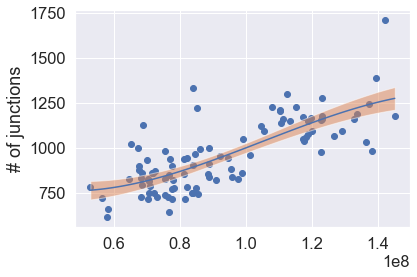

In [20]:
df = pd.read_csv("majiq_covid_genes_alpha_mid", sep=' ', header=None)
coefficients = fitDepthCounts(df, "junctions", 3)

  level  count      depth  depth_unique                sample
0   low   2081   72286717      68111224  ./covid/ID39_1st_TPM
1   low   2527  109730160     101160321  ./covid/ID39_2nd_TPM
2   low   2815  125809399     117241471  ./covid/ID39_3rd_TPM
3   low   2351   88385364      83779221  ./covid/ID40_1st_TPM
4   low   2222   68981285      64649886  ./covid/ID40_2nd_TPM


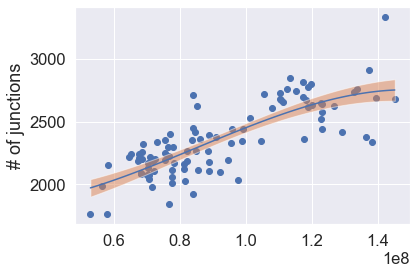

In [21]:
df = pd.read_csv("majiq_covid_genes_alpha_low", sep=' ', header=None)
coefficients = fitDepthCounts(df, "junctions", 3)

In [ ]:
df = pd.read_csv("majiq_covid_genes_alpha_low", sep=' ', header=None)
coefficients = fitDepthCounts(df, "junctions", 3)